# Import Module

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from scipy.optimize import minimize
from scipy.optimize import dual_annealing
from sklearn.decomposition import PCA

# Settings

### Variables

In [2]:
variables = ['SW']
variable = 'SW'
TITLE = 'SW Net upgoing flux'

### Paths

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
path_files='/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/'

### List of members

In [4]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

len(nb_p_list)

102

## Get the PPE pc

In [5]:
pc_PPE = pd.DataFrame()

for i in range(1,101,1) :
    tmp = np.load(file=path_files+'npy/CNRMppe_decomposition_EOF'+str(i)+'pc_'+str(variable)+'.npy')
    pc_PPE['modes_'+str(i)] = tmp
    
pc_PPE    

,modes_1,modes_2,modes_3,modes_4,modes_5,modes_6,modes_7,modes_8,modes_9,modes_10,...,modes_91,modes_92,modes_93,modes_94,modes_95,modes_96,modes_97,modes_98,modes_99,modes_100
0,-3306.496094,-937.096008,-680.393005,-246.741501,-315.262360,106.189392,-14.775179,-309.207458,195.862045,-206.101562,...,17.932800,17.902946,19.522755,20.764698,11.807881,-19.290504,-20.296961,12.259738,3.503934,12.154648
1,-57.945522,423.965485,-191.056427,-320.447418,113.098717,-110.907005,215.536438,-80.435150,46.603577,-15.993403,...,8.802542,51.837318,54.891918,-6.870715,-0.056774,34.837681,-28.678749,-36.825268,2.960655,-4.629114
2,-265.019135,-603.432007,-487.476196,-123.818115,173.148529,-92.572891,78.039093,-75.999153,-39.758053,-240.903778,...,21.239134,-16.534178,-35.122272,-0.338824,29.550224,15.520970,-2.775218,19.534334,-22.660564,-10.122669
3,-465.381805,-560.205505,856.245605,-434.698761,362.872864,79.629341,359.623810,140.078720,-30.116776,110.492165,...,-16.942158,-44.118576,0.549811,-9.735617,26.217535,33.200520,6.157621,-0.743531,-6.094273,2.141720
4,-1299.262451,-1321.100098,-709.392151,-280.835236,-45.410355,-493.784302,-146.738327,142.558075,-244.197891,-238.499847,...,5.733010,-1.366107,-10.661658,1.707205,12.866241,28.315119,-8.481415,-9.543539,-9.066311,0.841918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-66.209442,983.981445,-446.045654,-210.029587,-62.950966,30.416216,52.030849,-189.882782,-93.170021,188.368973,...,-12.409633,0.327599,-1.558398,10.501719,-2.661361,-2.074381,8.121605,8.371895,-1.158819,-1.269306
98,1935.851562,-64.010681,-84.523834,257.434540,244.741150,80.254402,-10.116295,87.055382,191.513184,-6.548390,...,-31.850409,72.056389,22.000160,-14.725355,43.573631,-11.417365,16.759478,-41.804466,24.343487,6.727323
99,1182.452515,386.264893,-293.406250,-12.874421,-59.124249,51.940674,116.353683,-44.133816,-65.265060,-64.456871,...,-10.037496,46.547577,17.744478,-29.904097,-12.840011,-0.847130,-13.264271,29.111296,-95.591873,-25.940920
100,-112.205254,612.404114,-712.781189,-252.426880,-305.036346,-30.399096,183.212524,188.408508,-261.484314,42.393620,...,-18.779646,14.808481,-68.864311,23.522778,-15.292162,2.950333,-10.213696,-32.210949,43.263821,-38.153122


## Emulation

In [6]:
def MultiLinReg(limit_train, EOF_nb, x, variable) :
    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file=path_files+'npy/CNRMppe_decomposition_EOF'+str(EOF_nb)+'pc_'+str(variable)+'.npy')
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")
    
    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X[0:limit_train], y[0:limit_train])
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
  
    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

In [7]:
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
pc_OS={}
pc={}


def predict_OS(X, EOF_nb) :
    tmp_list = []
    for x in X[80:] :
        tmp = MultiLinReg(80, EOF_nb, x, variable)
        tmp_list.append(tmp)
    return tmp_list

def predict_train(X, EOF_nb) :
    tmp_list = []
    for x in X[:80] :
        tmp = MultiLinReg(80, EOF_nb, x, variable)
        tmp_list.append(tmp)
    return tmp_list
    
for i in range(1,101,1) : 
    pc_OS['modes_'+str(i)] = predict_OS(X, i)
    pc['modes_'+str(i)] = predict_train(X,i)

#pc_pred

In [8]:
df_pc_OS = pd.DataFrame(pc_OS['modes_1'], columns=['modes_1'])
df_pc = pd.DataFrame(pc['modes_1'], columns=['modes_1'])
for i in range(1,101,1) :
    df_pc_OS['modes_'+str(i)] = pc_OS['modes_'+str(i)]
    df_pc['modes_'+str(i)] = pc['modes_'+str(i)]

# Loop over 1 to 100 modes considered

In [9]:
df_corr = pd.DataFrame(pc_PPE['modes_1'][0:80], columns=['pc_PPE'])
df_corr_OS = pd.DataFrame(pc_PPE['modes_1'][80:], columns=['modes_1'])
r_corr = {}
r_corr_OS = {}

for i in range(1,101,1) :
    
    df_corr['pc_PPE'] = pc_PPE['modes_'+str(i)][0:80]
    df_corr['pc_pred'] = df_pc['modes_'+str(i)]
    r_corr_tmp = np.corrcoef(df_corr['pc_PPE'], df_corr['pc_pred'])
    r_corr['modes_'+str(i)]  = r_corr_tmp[1,0]
    
    df_corr_OS['pc_PPE'] = pc_PPE['modes_'+str(i)][80:]
    df_corr_OS['pc_pred'] = df_pc_OS['modes_'+str(i)].values
    r_corr_OS_tmp = np.corrcoef(df_corr_OS['pc_PPE'], df_corr_OS['pc_pred'])
    r_corr_OS['modes_'+str(i)]  = r_corr_OS_tmp[1,0]


In [10]:
r_corr_list=[]
r_corr_OS_list = []

for i in range(1,101,1) : 
    r_tmp = r_corr['modes_'+str(i)]
    r_corr_OS_tmp = r_corr_OS['modes_'+str(i)]

    r_corr_list.append(r_tmp)
    r_corr_OS_list.append(r_corr_OS_tmp)

df_fig = pd.DataFrame(r_corr_list, columns=['r_corr'])
df_fig['r_corr_OS'] = r_corr_OS_list
df_fig['mode'] = range(1,101,1)
df_fig

,r_corr,r_corr_OS,mode
0,0.900534,0.723808,1
1,0.908838,0.871451,2
2,0.893448,0.839333,3
3,0.892478,0.737735,4
4,0.943853,0.795852,5
...,...,...,...
95,0.516153,-0.122895,96
96,0.450303,-0.137434,97
97,0.519661,-0.196515,98
98,0.490177,-0.246745,99


# Figure

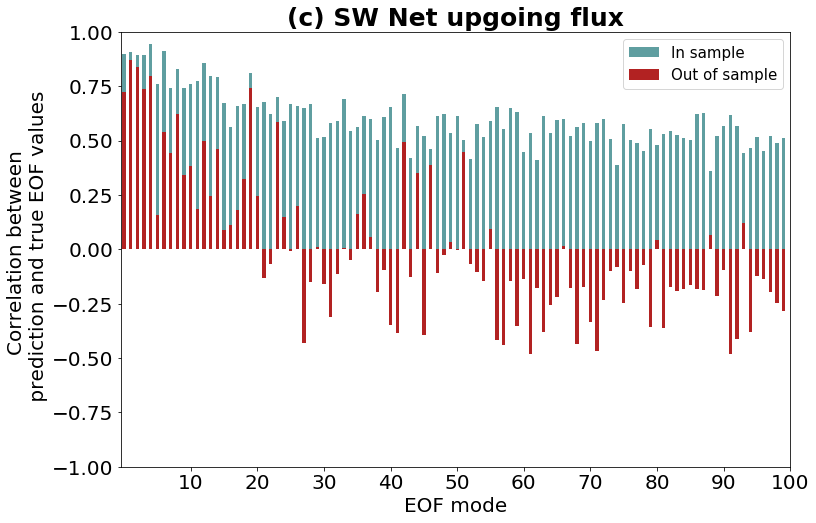

In [12]:
plt.figure(figsize=(12, 8))
    

ax = plt.gca()

df_fig.plot(kind='bar', x='mode', y='r_corr', color = 'cadetblue', alpha=1, linewidth=4, ax=ax)
df_fig.plot(kind='bar', x='mode', y='r_corr_OS', color='firebrick', linewidth=4, ax=ax)
#df_fig.plot(kind='line', x='mode', y='r_corr_pred', color='black', linestyle='dashed', linewidth=1.5, ax=ax)

#ax.axhline(0, color='k', alpha=0.5)
ax.set_ylim(-1, 1)
ax.set_xlabel('EOF mode', size = 20)
ax.set_ylabel('Correlation between \n prediction and true EOF values', size = 20)
ax.set_title('(c) '+TITLE, fontsize=25, 
             fontweight = 'bold')
#ax.set_xscale('log')
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
#ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax.set_xticks(range(10, 101, 10))
ax.set_xticklabels(range(10, 101, 10))

plt.xticks(rotation=0)

# Legend .................

legend = [ 'In sample', 'Out of sample']
#ax.get_legend().remove()
ax.legend(legend, fontsize=15) #bbox_to_anchor=(1.05, 1)

# Grid .................
#ax.grid(True, which="both", axis='x')

# Save la figure .................
plt.savefig("/data/home/globc/peatier/figures/Fig2_"+variable+".png", 
            orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()